In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler


In [2]:
#Set Connecion

#Get from developer twiiter.com/App->Settings->Key & tokens
#Just assign the credentials

consumer_key="NFqFPROcdJcZ8WMzn1VHZ7m8I"
consumer_secret="dIpa37IyfrvrAyXUIQFJX6ua8m1njY1q6Y0kKjTw1qJAtoGZ0R"
access_token="1394858173476052995-aC7o2scH5NAFq0inQw7in5g6dWj9ZI"
access_token_secret="v1HA1Fw90JmiQab3LtK92zl8mBKeO1fhGMfkg8HX8ZHmj"

In [3]:
#use the above credentials to authenticate the API.

auth =tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)

In [4]:
df=pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Links","RT","User_location"])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Links, RT, User_location]
Index: []


In [5]:
def get_tweets(Topic,Count):
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100,lang="en",exclude='retweets').items():
        print(i, end='/r')
        df.loc[i,"Date"]=tweet.created_at
        df.loc[i,"User"]=tweet.user.name
        df.loc[i,"IsVerified"]=tweet.user.verified
        df.loc[i,"Tweet"]=tweet.text
        df.loc[i,"Likes"]=tweet.favorite_count
        df.loc[i,"RT"]=tweet.retweet_count
        df.loc[i,"User_location"]=tweet.user.location
   #  save as csv file   
    #df.to_csv("TWeeteDataset.csv",index=False)
        i=i+1
        if i>Count:
               break
              
    

In [6]:
# call the function to extract the data.pass the topic and file name for data to be stored in.
Topic=["Arsenal"]
get_tweets(Topic, Count=100)

0/r1/r2/r3/r4/r5/r6/r7/r8/r9/r10/r11/r12/r13/r14/r15/r16/r17/r18/r19/r20/r21/r22/r23/r24/r25/r26/r27/r28/r29/r30/r31/r32/r33/r34/r35/r36/r37/r38/r39/r40/r41/r42/r43/r44/r45/r46/r47/r48/r49/r50/r51/r52/r53/r54/r55/r56/r57/r58/r59/r60/r61/r62/r63/r64/r65/r66/r67/r68/r69/r70/r71/r72/r73/r74/r75/r76/r77/r78/r79/r80/r81/r82/r83/r84/r85/r86/r87/r88/r89/r90/r91/r92/r93/r94/r95/r96/r97/r98/r99/r100/r

In [7]:
df.head(10)

Date                            User IsVerified  \
0  2021-06-30 03:58:42             Steve Ruigu Njuguna      False   
1  2021-06-30 03:57:49                     Brian Shack      False   
2  2021-06-30 03:56:49                   Sahil Maredia      False   
3  2021-06-30 03:56:20                         V ANAND      False   
4  2021-06-30 03:55:22  Arteta's Hair Gel🥊🏐🚵‍♂️🏴󠁧󠁢󠁷󠁬󠁳󠁿      False   
5  2021-06-30 03:54:56                       Afc_Toast      False   
6  2021-06-30 03:54:51                               🥺      False   
7  2021-06-30 03:54:49                            Saba      False   
8  2021-06-30 03:54:08                            Alex      False   
9  2021-06-30 03:54:04                      The Berks👒      False   

                                               Tweet Links RT  \
0  Said it before and ill say it again.\nZinchenk...   NaN  0   
1  @visionarydou @ForzaJuveEN @_GoncaloLopes Arse...   NaN  0   
2  @Arsenal @BukayoSaka87 @England Only non arsen...   NaN  0   
3  @ltarsenal @Arsenal If Kroenkes really care ab...   NaN  0   
4  @now_arsenaI @Arsenal Hes practically blind. W...   NaN  0   
5  @Arsenal @BukayoSaka87 @England Ok... Now sign...   NaN  0   
6  @anoopdomgeorge @AFCBagsman14 @Arsenal @Bukayo...   NaN  0   
7  @dannykellywords @SpursOfficial I think pictur...   NaN  0   
8  This is Lee, he is an Arsenal fan\n\nLee doesn...   NaN  0   
9  @Jarl_AFC @kunal_sarcastic @RishabhPant17 You ...   NaN  0   

      User_location  Likes  
0    Nairobi, Kenya    0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
5             India    0.0  
6                      0.0  
7  ❤️ Eretz Yisrael    0.0  
8                      7.0  
9     Pale Blue Dot    0.0

# Analyze the Tweets

In [8]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\S+)|([RT])',' ',str(tweet).lower()).split())

In [9]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #removed @mentions
    text=re.sub(r'#','',text) # removing the # symbol
    text=re.sub(r'RT[\s]+','',text) #Removing RT
    text=re.sub(r'https?:\/\/s+','',text) # Removing the hyper link
    
    return text

In [10]:
# Function to analyze sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
# Function to pre-process data for Worldcloud: here we are removing the words present in Topic from the corpus so they dont come in WordCloud.
# ex: Topic is "Arsenal" vs "United" .we want to remove "Arsenal" vs "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
        Topic = str(Topic).lower()
        Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
        Topic = re.split("\s+",str(Topic))
        stopwords = set(STOPWORDS)
        stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
        ###
        text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
        return text_new
    


In [12]:
#  To get clean tweets

df['Tweet']=df['Tweet'].apply(cleanTxt)
df.head(5)

Date                            User IsVerified  \
0  2021-06-30 03:58:42             Steve Ruigu Njuguna      False   
1  2021-06-30 03:57:49                     Brian Shack      False   
2  2021-06-30 03:56:49                   Sahil Maredia      False   
3  2021-06-30 03:56:20                         V ANAND      False   
4  2021-06-30 03:55:22  Arteta's Hair Gel🥊🏐🚵‍♂️🏴󠁧󠁢󠁷󠁬󠁳󠁿      False   

                                               Tweet Links RT   User_location  \
0  Said it before and ill say it again.\nZinchenk...   NaN  0  Nairobi, Kenya   
1    @_GoncaloLopes Arsenal fan should not talk a...   NaN  0                   
2     Only non arsenal fan and non rival arsenal ...   NaN  0                   
3    If Kroenkes really care about the club, they...   NaN  0                   
4  _arsenaI  Hes practically blind. When he was a...   NaN  0                   

   Likes  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [13]:
# To get sentiments
df["Sentiment"]=df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

Date                            User IsVerified  \
0  2021-06-30 03:58:42             Steve Ruigu Njuguna      False   
1  2021-06-30 03:57:49                     Brian Shack      False   
2  2021-06-30 03:56:49                   Sahil Maredia      False   
3  2021-06-30 03:56:20                         V ANAND      False   
4  2021-06-30 03:55:22  Arteta's Hair Gel🥊🏐🚵‍♂️🏴󠁧󠁢󠁷󠁬󠁳󠁿      False   

                                               Tweet Links RT   User_location  \
0  Said it before and ill say it again.\nZinchenk...   NaN  0  Nairobi, Kenya   
1    @_GoncaloLopes Arsenal fan should not talk a...   NaN  0                   
2     Only non arsenal fan and non rival arsenal ...   NaN  0                   
3    If Kroenkes really care about the club, they...   NaN  0                   
4  _arsenaI  Hes practically blind. When he was a...   NaN  0                   

   Likes Sentiment  
0    0.0  Negative  
1    0.0   Neutral  
2    0.0   Neutral  
3    0.0  Positive  
4    0.0  Negative

In [14]:
df["Sentiment"].value_counts()

Neutral     48
Positive    35
Negative    18
Name: Sentiment, dtype: int64

In [15]:
print("Total Tweets Extracted for Topic : {}".format(Topic,len(df['Tweet'])))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Arsenal']
Total Positive Tweets are : 35
Total Negative Tweets are : 18
Total Neutral Tweets are : 48


C:\Users\SOUMITRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

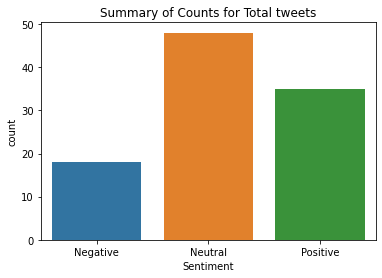

In [16]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

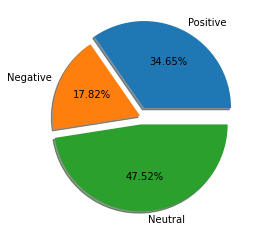

In [17]:
# pie chart
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode=(0.1,0.0,0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

## Generate WordCloud

In [18]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [19]:
# start with one Rivew
text=df['Tweet'][2]

In [20]:
text

'   Only non arsenal fan and non rival arsenal can judge how saka performed.'

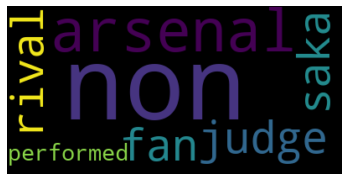

In [21]:
#Create and generate a word cloud image:
wordcloud=WordCloud(max_words=10).generate(text)

# Display the generated Image:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

There are 8766 words in the combination of all review.


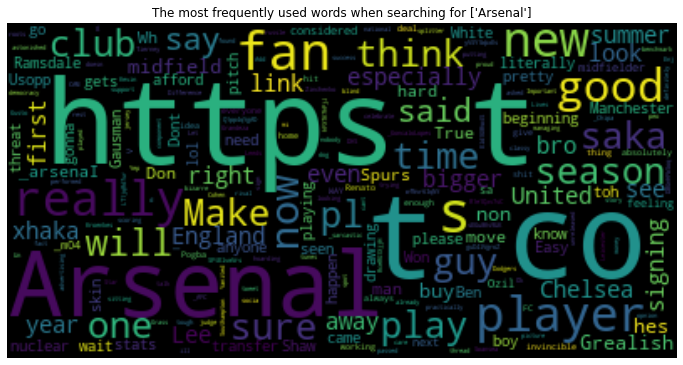

In [22]:
# Combine all reviews into one big text and create a cloud to see which Words are most common in these Tweets.

text=" ".join(review for review in df.Tweet)
print("There are {} words in the combination of all review.".format(len(text)))

#Create stopword list:
stopwords=set(STOPWORDS)

text_newALL= prepCloud(text,Topic)

# Generate a word cloud image:
wordcloud=WordCloud(stopwords=stopwords, max_words=500, max_font_size=70).generate(text_newALL)



# Display the generated image:

plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()


Get WordCloud for all positive Tweets about 8766


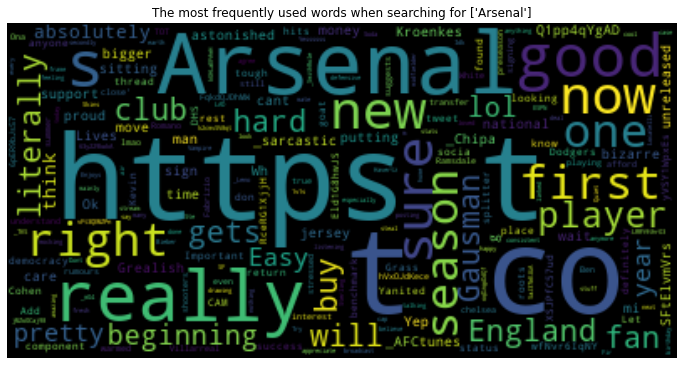

In [23]:

text_positive=" ".join(review for review in df[df["Sentiment"]=="Positive"].Tweet)
print("Get WordCloud for all positive Tweets about {}".format(len(text)))
stopwords=set(STOPWORDS)
text_new_positive= prepCloud(text_positive,Topic)
wordcloud= WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()


Get WordCloud for all positive Tweets about 3416


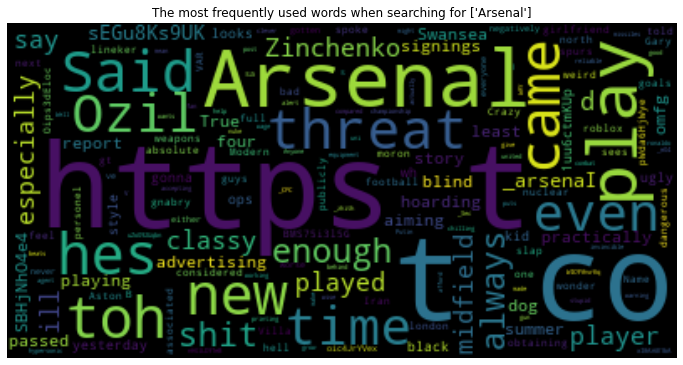

In [25]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most Common in these Tweets
text_nagetive=" ".join(review for review in df[df["Sentiment"]=="Negative"].Tweet)
print("Get WordCloud for all positive Tweets about {}".format(len(text_positive)))
stopwords=set(STOPWORDS)
text_new_negative= prepCloud(text_nagetive,Topic)
wordcloud= WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()
